##**의류 이미지 분류**

https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%90%EC%83%89

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


### 0. 패션 MNIST 데이터셋 임포트하기

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 1. 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### 2. 데이터 전처리
* 픽셀 값 범위 0~255

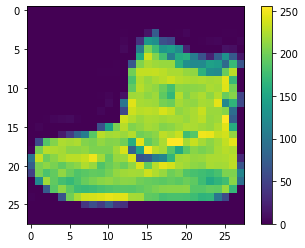

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* 범위 조정

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

* 데이터 확인

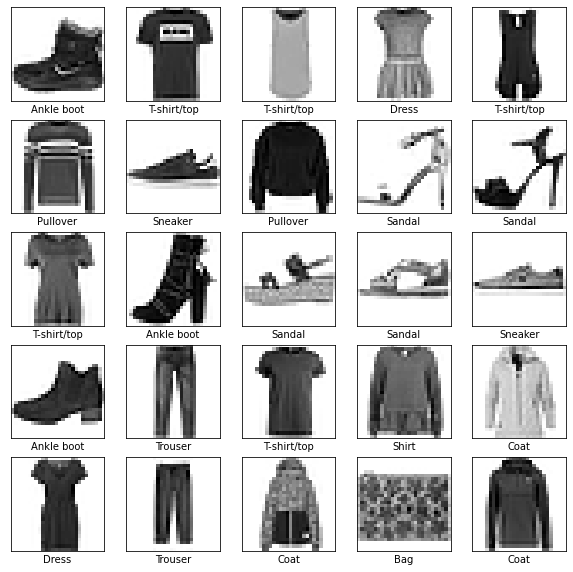

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3. 모델 구성

#### 1) 층 설정


* 신경망 모델을 만들기 위해 모델의 층을 구성한 다음 모델을 컴파일

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

* 1Layer : 2차원 배열의 이미지 포맷을 784 픽셀의 1차원 배열로 변환

* 2Layer~ : Dense Layer

* Last Layer : softmax layer
  * 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함

#### 2) 모델 컴파일
   * 손실함수 : 훈련 중 모델이 얼마나 정확한지 측정. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 함
   * 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
   * 메트릭 : 훈련 및 테스트 단계를 모니터링하는 데 사용 -> accuracy 사용

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 4. 모델 훈련

* 단계
  * 훈련 데잍를 모델에 주입
  * 모델이 이미지와 레이블을 매핑하는 방법을 학습
  * 테스트 세트에 대한 모델의 예측 만들기
  * 예측이 라벨과 일치하는지 확인

#### 1) 모델 fit

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5023 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3795 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3422 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.8829
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2570 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

### 5. 정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3443 - accuracy: 0.8794 - 731ms/epoch - 2ms/step

Test accuracy: 0.8794000148773193


> 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음 (과대적합)

### 6. 예측하기

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


* 첫번째 예측

In [19]:
predictions[0]

array([6.93617395e-08, 2.16695585e-11, 7.07401249e-09, 1.62235350e-10,
       1.01979705e-08, 1.40832970e-02, 5.41672648e-07, 3.38919694e-03,
       1.54217017e-09, 9.82526839e-01], dtype=float32)

In [20]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [21]:
# true label 확인
test_labels[0]

9

* 10개 클래스에 대한 예측 그래프로 표현

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 7. 예측 확인

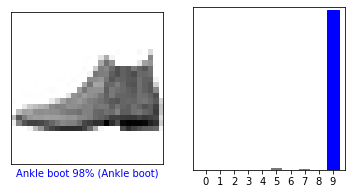

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

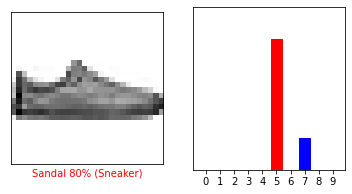

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

* 몇 개의 이미지에 대해 예측 출력
  * 올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨간색

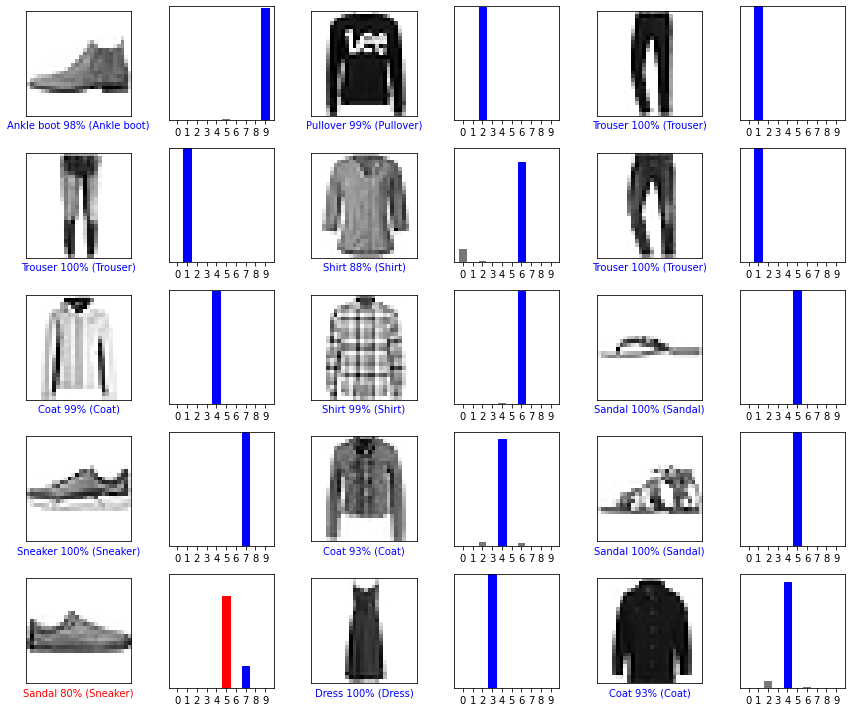

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 7. 훈련된 모델 사용하기

* 훈련된 모델을 사용하여 한 이미지에 대한 예측 만들기

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


* tf.keras 모델은 한 번에 샘플의 묶음 또는 배치로 예측을 만드는데 최적화 되어 있음

In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[1.1332383e-04 1.0974333e-13 9.9458003e-01 1.8325739e-08 2.7169464e-03
  2.1098727e-14 2.5898099e-03 2.0050020e-16 1.0572142e-10 5.9944318e-13]]


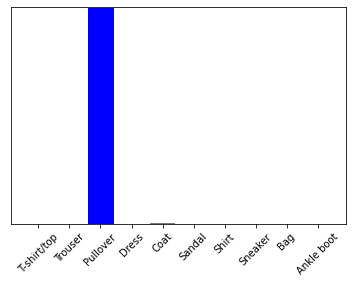

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

* tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록을 반환 => 배치에서 유일한 이미지에 대한 예측 가져오기 

In [30]:
np.argmax(predictions_single[0])

2